In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical


In [2]:
#Step 2 - Load Data
fashion_df = pd.read_csv('./Datasets//fashion-mnist_train.csv', sep=',')

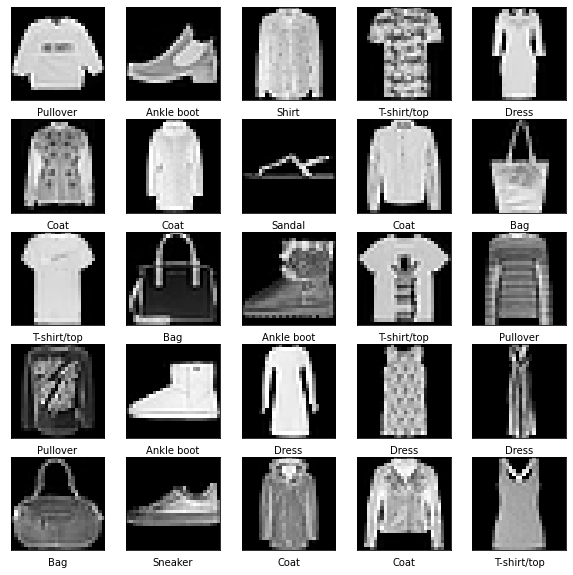

In [3]:
# Step 3 - Visualization

label_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = fashion_df.iloc[i, 1:].values.reshape(28, 28)
    plt.imshow(image, cmap='gray')#'viridis', 'jet', 'hot', 'cool', 'spring', 'summer', 'autumn', 'winter', 'copper', and 'rainbow'.
    plt.xlabel(label_names[fashion_df.iloc[i, 0]])
plt.show()


In [4]:
# Step 4 - Preprocess Data

# Convert the dataframe to numpy array
dataset = np.asarray(fashion_df, dtype='float32')

# Separate features and labels
X = dataset[:, 1:] / 255.0  # Normalize pixel values to the range [0, 1]
y = dataset[:, 0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data into 28x28x1 images
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [5]:
# Step 5 - Build the Model

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
# Step 6 - Train the Model
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
375/375 [==============================] - 15s 37ms/step - loss: 0.6056 - accuracy: 0.7862 - val_loss: 0.3905 - val_accuracy: 0.8559
Epoch 2/10
375/375 [==============================] - 20s 53ms/step - loss: 0.3951 - accuracy: 0.8610 - val_loss: 0.3309 - val_accuracy: 0.8827
Epoch 3/10
375/375 [==============================] - 22s 58ms/step - loss: 0.3463 - accuracy: 0.8766 - val_loss: 0.2945 - val_accuracy: 0.8948
Epoch 4/10
375/375 [==============================] - 24s 63ms/step - loss: 0.3211 - accuracy: 0.8850 - val_loss: 0.2770 - val_accuracy: 0.9004
Epoch 5/10
375/375 [==============================] - 22s 58ms/step - loss: 0.2990 - accuracy: 0.8928 - val_loss: 0.2666 - val_accuracy: 0.9027
Epoch 6/10
375/375 [==============================] - 22s 60ms/step - loss: 0.2864 - accuracy: 0.8963 - val_loss: 0.2605 - val_accuracy: 0.9059
Epoch 7/10
375/375 [==============================] - 32s 86ms/step - loss: 0.2734 - accuracy: 0.9014 - val_loss: 0.2552 - val_accuracy:

In [7]:
# Step 7 - Evaluate the Model

_, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', accuracy)

375/375 [==============================] - 5s 13ms/step - loss: 0.2393 - accuracy: 0.9133
Test Accuracy: 0.9133333563804626


In [8]:
# Step 8 - Make Predictions

predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)


375/375 [==============================] - 5s 12ms/step


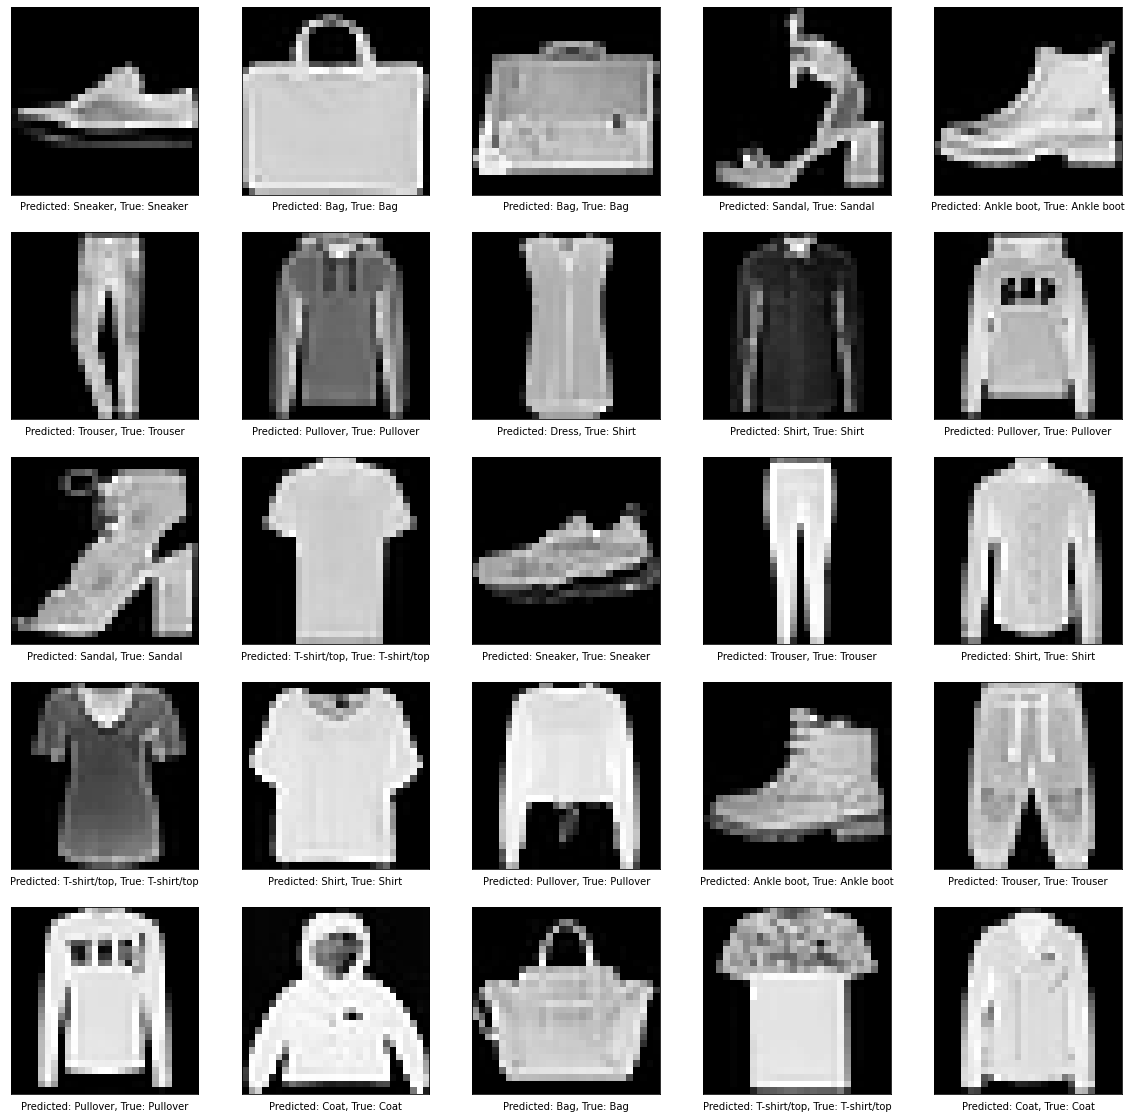

In [9]:
# Step 9 - Visualize Predictions

plt.figure(figsize=(20, 20))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.xlabel(f"Predicted: {label_names[predicted_labels[i]]}, True: {label_names[np.argmax(y_test[i])]}")

plt.show()

In [10]:
# #Convolutional Layers: Convolutional layers are the key building blocks of a CNN. They apply a set of learnable filters (also known as kernels) to the input data, performing a convolution operation. Each filter detects specific features or patterns in the input, such as edges, textures, or shapes. Convolutional layers help to capture local spatial dependencies in the data.

# Pooling Layers: Pooling layers are used to downsample the output from convolutional layers. They reduce the spatial dimensions of the data while retaining the most important features. The commonly used pooling operation is max pooling, which selects the maximum value within a window or region.

# Activation Function: Activation functions introduce non-linearities to the network, allowing it to model complex relationships. Common activation functions used in CNNs include ReLU (Rectified Linear Unit), sigmoid, and tanh.

# Fully Connected Layers: After several convolutional and pooling layers, the output is flattened and passed to fully connected layers. These layers are similar to the ones used in traditional neural networks. They connect every neuron from the previous layer to the subsequent layer, allowing for high-level feature learning and classification.

# Loss Function: CNNs are typically trained using a loss function that quantifies the difference between predicted and actual values. For classification tasks, the softmax function is commonly used with cross-entropy loss.

# Backpropagation and Optimization: CNNs are trained using backpropagation, where the gradients of the loss function with respect to the model parameters are calculated and used to update the weights and biases. Optimization algorithms such as Stochastic Gradient Descent (SGD), Adam, or RMSprop are used to update the parameters iteratively.

In [11]:
# from sklearn.model_selection import train_test_split: This import statement is used to import the train_test_split function from scikit-learn. It is used to split the dataset into training and testing subsets.

# from sklearn.metrics import confusion_matrix, classification_report: This import statement imports the confusion_matrix and classification_report functions from scikit-learn. These functions are used to evaluate the performance of a classification model by comparing the predicted labels with the true labels.

# from tensorflow.keras.models import Sequential: This import statement imports the Sequential class from the Keras module of TensorFlow. The Sequential class is used to create a sequential model where layers are added one after the other.

# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten: This import statement imports various layer classes from the Keras module of TensorFlow. These layers are building blocks of a neural network model. Here, Conv2D represents a 2D convolutional layer, MaxPooling2D represents a 2D max-pooling layer, Dropout represents a dropout layer, Dense represents a fully connected layer, and Flatten represents a layer to flatten the input.

# from tensorflow.keras.optimizers import Adam: This import statement imports the Adam optimizer from the Keras module of TensorFlow. Adam is a popular optimization algorithm used to train neural networks.

# from tensorflow.keras.callbacks import TensorBoard: This import statement imports the TensorBoard callback from the Keras module of TensorFlow. TensorBoard is a visualization tool that can be used to monitor the training process of a neural network.

# from tensorflow.keras.utils import to_categorical: This import statement imports the to_categorical function from the Keras module of TensorFlow. It is used to convert class labels into one-hot encoded vectors, which is often required for multi-class classification problems.